In [37]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
sns.set();


In [3]:
print (pd.__version__)

0.20.1


In [15]:
df=pd.read_excel("../data/coalpublic2015.xls", header=2,index_col='MSHA ID')

df.head()

,Year,Mine Name,Mine State,Mine County,Mine Status,Mine Type,Company Type,Operation Type,Operating Company,Operating Company Address,Union Code,Coal Supply Region,Production (short tons),Average Employees,Labor Hours
MSHA ID,,,,,,,,,,,,,,,
103381,2015,Jesse Creek H.W.M.,Alabama,Bibb,Active,Surface,Indepedent Producer Operator,Mine only,"Jesse Creek Mining,llc","1615 Kent Dairy Rd, Alabaster, AL 35007",NaN,Appalachia Southern,62598,6,13713
103246,2015,Bear Creek,Alabama,Franklin,Temporarily closed,Surface,Indepedent Producer Operator,Mine only,"Birmingham Coal & Coke Co., In","912 Edenton Street, Birmingham, AL 35242",NaN,Appalachia Southern,25481,9,17641
103451,2015,Knight Mine,Alabama,Franklin,Temporarily closed,Surface,Indepedent Producer Operator,Mine only,"Birmingham Coal & Coke Co., In","P.O. Box 354, Lynn, AL 35242",NaN,Appalachia Southern,121474,21,51729
102933,2015,Mine No 2,Alabama,Jackson,Temporarily closed,Surface,Indepedent Producer Operator,Mine only,"Alabama Carbon, Llc","5957 Windswept Blvd, Wise, VA 24293",NaN,Appalachia Southern,3939,5,5287
100329,2015,Concord Mine,Alabama,Jefferson,Active,Underground,Operating Subsidiary,Preparation Plant,Oak Grove Resources Llc,"8360 Taylors Ferry Rd, Hueytown, AL 35023",United Mine Workers Of America,Appalachia Southern,0,52,119679


In [16]:
df['Company Type'].unique()

array(['Indepedent Producer Operator', 'Operating Subsidiary', 'Contractor'], dtype=object)

In [18]:
df['Company Type'].replace(to_replace='Indepedent Producer Operator',
                           value='Independent Producer Operator',
                           inplace=True)

In [19]:
df['Company Type'].head()

MSHA ID
103381    Independent Producer Operator
103246    Independent Producer Operator
103451    Independent Producer Operator
102933    Independent Producer Operator
100329             Operating Subsidiary
Name: Company Type, dtype: object

In [20]:
df.rename(columns=lambda x: x.replace(" ", "_"), inplace=True)

In [21]:
df.head()

,Year,Mine_Name,Mine_State,Mine_County,Mine_Status,Mine_Type,Company_Type,Operation_Type,Operating_Company,Operating_Company_Address,Union_Code,Coal_Supply_Region,Production_(short_tons),Average_Employees,Labor_Hours
MSHA ID,,,,,,,,,,,,,,,
103381,2015,Jesse Creek H.W.M.,Alabama,Bibb,Active,Surface,Independent Producer Operator,Mine only,"Jesse Creek Mining,llc","1615 Kent Dairy Rd, Alabaster, AL 35007",NaN,Appalachia Southern,62598,6,13713
103246,2015,Bear Creek,Alabama,Franklin,Temporarily closed,Surface,Independent Producer Operator,Mine only,"Birmingham Coal & Coke Co., In","912 Edenton Street, Birmingham, AL 35242",NaN,Appalachia Southern,25481,9,17641
103451,2015,Knight Mine,Alabama,Franklin,Temporarily closed,Surface,Independent Producer Operator,Mine only,"Birmingham Coal & Coke Co., In","P.O. Box 354, Lynn, AL 35242",NaN,Appalachia Southern,121474,21,51729
102933,2015,Mine No 2,Alabama,Jackson,Temporarily closed,Surface,Independent Producer Operator,Mine only,"Alabama Carbon, Llc","5957 Windswept Blvd, Wise, VA 24293",NaN,Appalachia Southern,3939,5,5287
100329,2015,Concord Mine,Alabama,Jefferson,Active,Underground,Operating Subsidiary,Preparation Plant,Oak Grove Resources Llc,"8360 Taylors Ferry Rd, Hueytown, AL 35023",United Mine Workers Of America,Appalachia Southern,0,52,119679


In [22]:
len(df)


1171

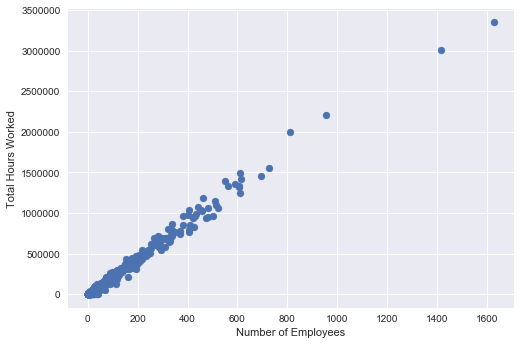

In [24]:
plt.scatter(df.Average_Employees, df.Labor_Hours)
plt.xlabel("Number of Employees")
plt.ylabel("Total Hours Worked")

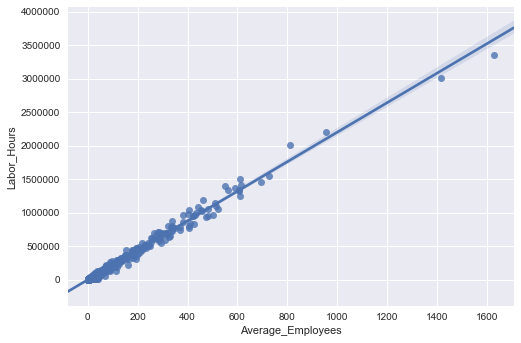

In [27]:
sns.regplot(df.Average_Employees, df.Labor_Hours)
plt.savefig("../figures/2015-11-21" + "-employees_vs_hours.png")

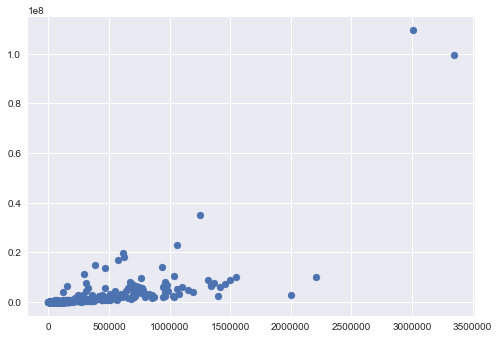

In [28]:
plt.scatter(df.Labor_Hours, df['Production_(short_tons)'])

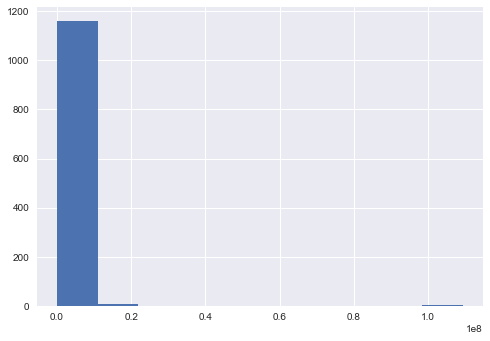

In [29]:
df['Production_(short_tons)'].hist()

In [32]:
# We are removing data here !
df = df[df['Production_(short_tons)'] > 0]

In [33]:
len(df)

853

In [38]:
df['log_production'] = np.log(df['Production_(short_tons)'])

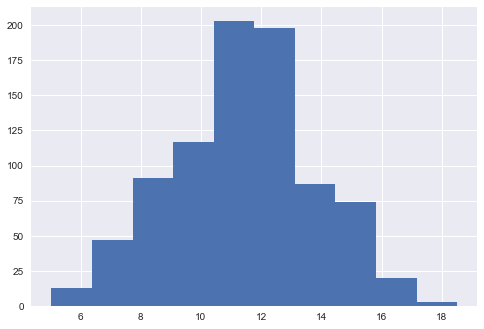

In [39]:
df['log_production'].hist()

In [40]:
df.to_csv('../data/cleaned_coalpublic2015.csv')